In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
# Move to project root
from pathlib import Path
import os

if not Path("./src/models").is_dir():
    for parent_path in Path.cwd().parents:
        if (parent_path / "src/models").is_dir():
            os.chdir(parent_path)
            break
    else:
        raise FileNotFoundError("Can't find project root")

assert Path("./src/models").is_dir()

In [3]:
from src import load_data

In [4]:
k_mnist = load_data.k_mnist()
fashion = load_data.fashion_mnist()
cifar10 = load_data.cifar10()
svhn = load_data.svhn()

o
ha


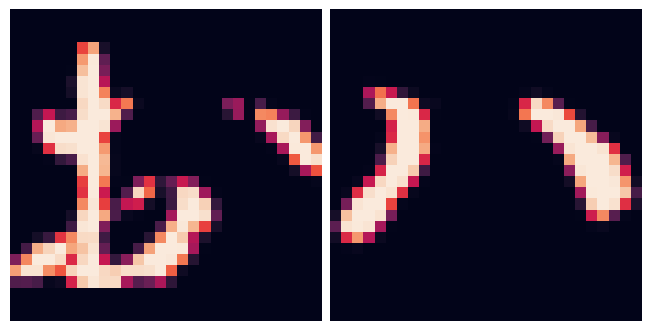

In [5]:
def show_examples(data: load_data.Dataset, offset: int = 0, count: int = 2):
    imgs = data.x_train[offset:offset + count].squeeze().numpy(force=True)
    if len(imgs.shape) == 4:
        imgs = np.moveaxis(imgs, 1, 3)
    labels = data.y_train[offset:offset + count].numpy(force=True)
    _, axs = plt.subplots(ncols=count, layout="compressed")
    for ax, img, label in zip(axs, imgs, labels):
        ax.imshow(img, vmin=0, vmax=1)
        ax.axis("off")
        print(data.label_names[label])


show_examples(k_mnist, offset=12)

Ankle boot
T-shirt/top


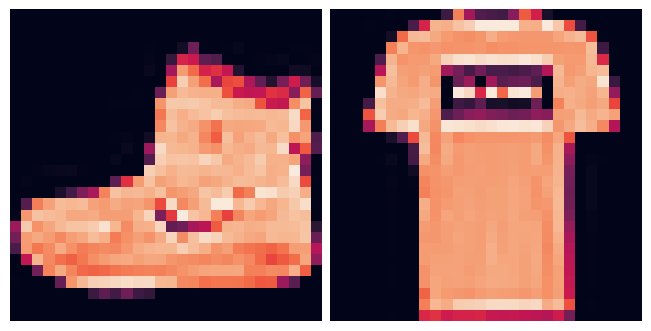

In [6]:
show_examples(fashion)

frog
truck


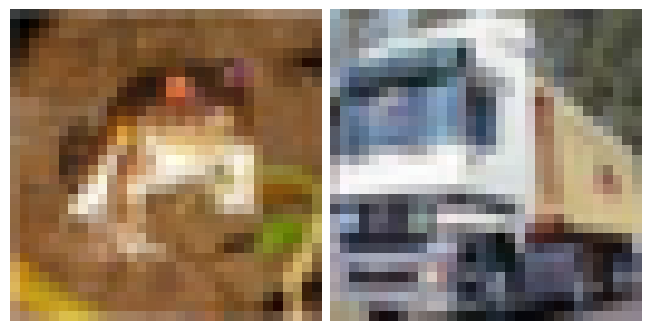

In [7]:
show_examples(cifar10)

3
4


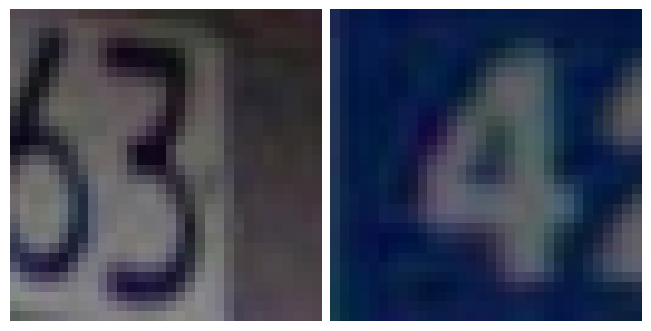

In [23]:
show_examples(svhn, offset=25)

In [26]:
from src.models import LeNet, CIFAR10CNN

m = LeNet(1, 10, "standard-2", debug=True)
print(m)
m(k_mnist.x_train[:5]);

Debug on, init=None
LeNet(
  (net): Sequential(
    (0): CheckNan()
    (1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
    (2): CheckNan()
    (3): ReLU()
    (4): CheckNan()
    (5): TorchMaxPool2D()
    (6): CheckNan()
    (7): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
    (8): CheckNan()
    (9): ReLU()
    (10): CheckNan()
    (11): TorchMaxPool2D()
    (12): CheckNan()
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): CheckNan()
    (15): LazyLinear(in_features=0, out_features=500, bias=True)
    (16): CheckNan()
    (17): ReLU()
    (18): CheckNan()
    (19): Linear(in_features=500, out_features=10, bias=True)
    (20): CheckNan()
  )
)
0: Item 1/1 was OK, shape=(5, 1, 28, 28) min=0.0 max=1.0
1: Item 1/1 was OK, shape=(5, 20, 24, 24) min=-1.0731282234191895 max=1.121042251586914
2: Item 1/1 was OK, shape=(5, 20, 24, 24) min=0.0 max=1.121042251586914
3: Item 1/1 was OK, shape=(5, 20, 12, 12) min=0.0 max=1.121042251586914
4: Item 1/1 was OK, shape=(5, 50, 8, 8) mi

In [34]:
m = CIFAR10CNN(3, 10, "aniso-7", debug=True).cuda()
# print(m)
m(cifar10.x_train[:5].cuda());

Debug on, init=None
0: Item 1/1 was OK, shape=(5, 3, 32, 32) min=0.0 max=1.0
1: Item 1/1 was OK, shape=(5, 32, 32, 32) min=-1.3211965560913086 max=0.8033919334411621
2: Item 1/1 was OK, shape=(5, 32, 32, 32) min=0.0 max=0.8033919334411621
3: Item 1/1 was OK, shape=(5, 32, 32, 32) min=-3.0979526042938232 max=17.943376541137695
4: Item 1/1 was OK, shape=(5, 32, 32, 32) min=-4.245481967926025 max=3.7549383640289307
5: Item 1/1 was OK, shape=(5, 32, 32, 32) min=0.0 max=3.7549383640289307
6: Item 1/1 was OK, shape=(5, 32, 32, 32) min=-0.8407632112503052 max=9.288254737854004
7: Item 1/1 was OK, shape=(5, 32, 16, 16) min=-0.8407632112503052 max=9.033852577209473
8: Item 1/1 was OK, shape=(5, 32, 16, 16) min=-1.2010903358459473 max=12.90550422668457
9: Item 1/1 was OK, shape=(5, 64, 16, 16) min=-8.063122749328613 max=9.378439903259277
10: Item 1/1 was OK, shape=(5, 64, 16, 16) min=0.0 max=9.378439903259277
11: Item 1/1 was OK, shape=(5, 64, 16, 16) min=-1.1867010593414307 max=12.3316936492919